In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/SAX J1810.8-2609.txt")

SAX J1810.8-2609
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  90
Converting uncertainties to 68% (assuming Gaussian errors).
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,SAX J1810.8-2609,90,[Hughes et al. 2024 & https://ui.adsabs.harvar...,[Hughes et al. 2024 & https://ui.adsabs.harvar...,NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,SAX J1810.8-2609,1621641679,L,59356.0664,0.010417,peak,HS,0.139,0.019295,18,NaN,NaN,False
1,SAX J1810.8-2609,1622155550,L,59361.9971,0.010417,peak,HS,0.104,0.019699,18,NaN,NaN,False
2,SAX J1810.8-2609,1622926875,L,59370.9384,0.010417,decay,HS,0.114,0.018881,17,NaN,NaN,False
3,SAX J1810.8-2609,1623537075,L,59378.0052,0.010417,rise,HS,0.050,0.016194,15,NaN,NaN,False
4,SAX J1810.8-2609,1624136593,L,59384.9575,0.010417,rise,HS,0.091,0.030333,18,NaN,NaN,True


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,SAX J1810.8-2609,32459005,59364.2184,0.007002,peak,HS,1.397000e-09,1.479241e-10,1.479241e-10,tbabs*(pegpwrlw + cflux * bbody),chi,False
1,SAX J1810.8-2609,32459006,59378.8865,0.013773,decay,HS,2.800000e-10,2.964150e-11,3.341621e-11,tbabs*(pegpwrlw + cflux * bbody),chi,False
2,SAX J1810.8-2609,32459007,59385.7875,0.011690,rise,HS,2.600000e-10,2.820907e-11,2.870264e-11,tbabs*(pegpwrlw + cflux * bbody),chi,False
3,SAX J1810.8-2609,32459008,59392.6670,0.014410,rise,HS,3.590000e-10,3.790318e-11,3.790318e-11,tbabs*(pegpwrlw + cflux * bbody),chi,False


# Light Curves

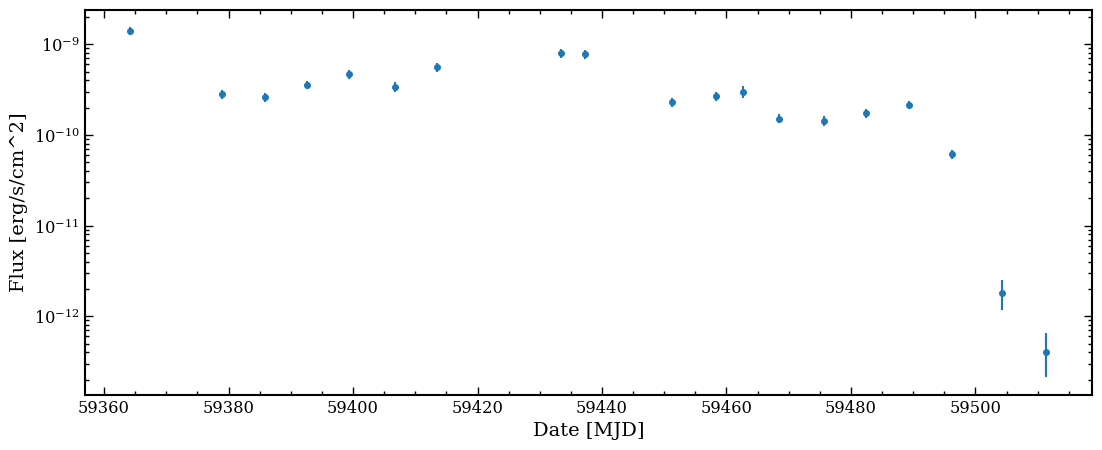

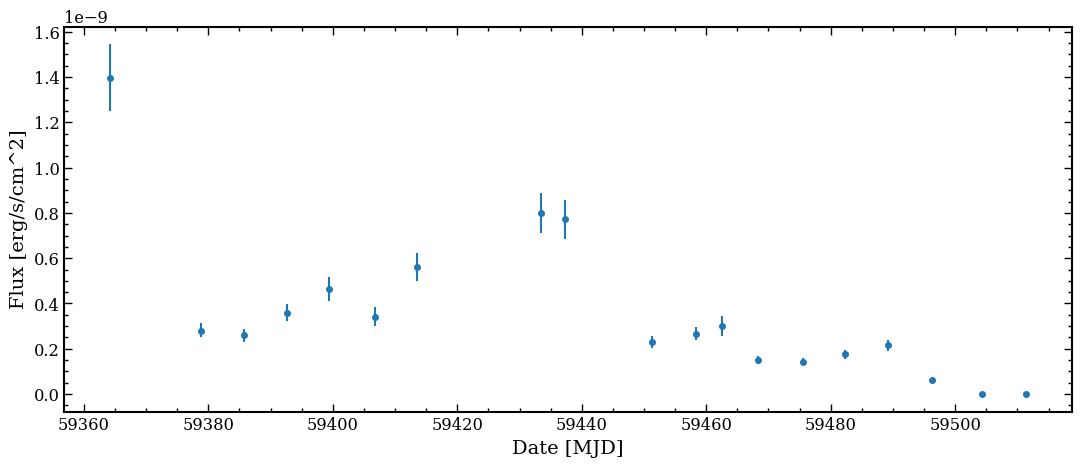

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

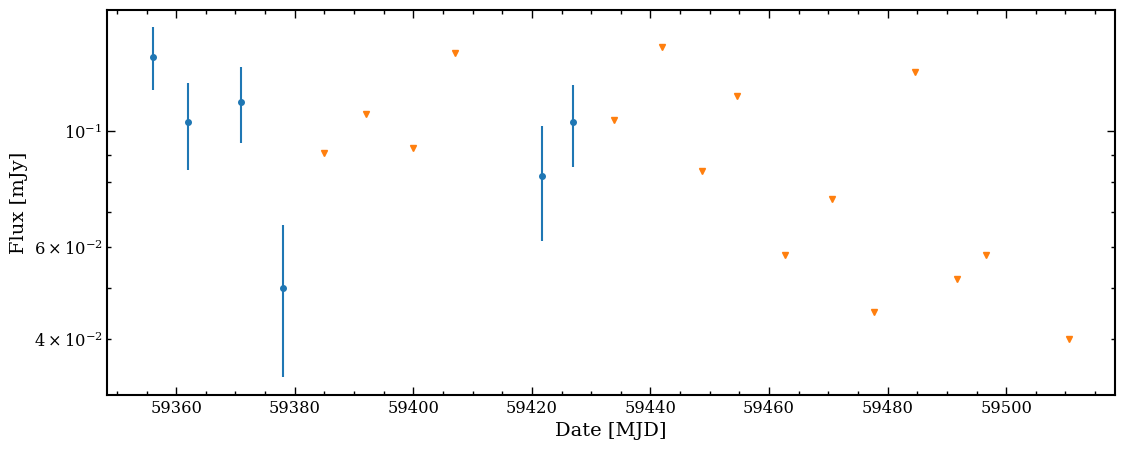

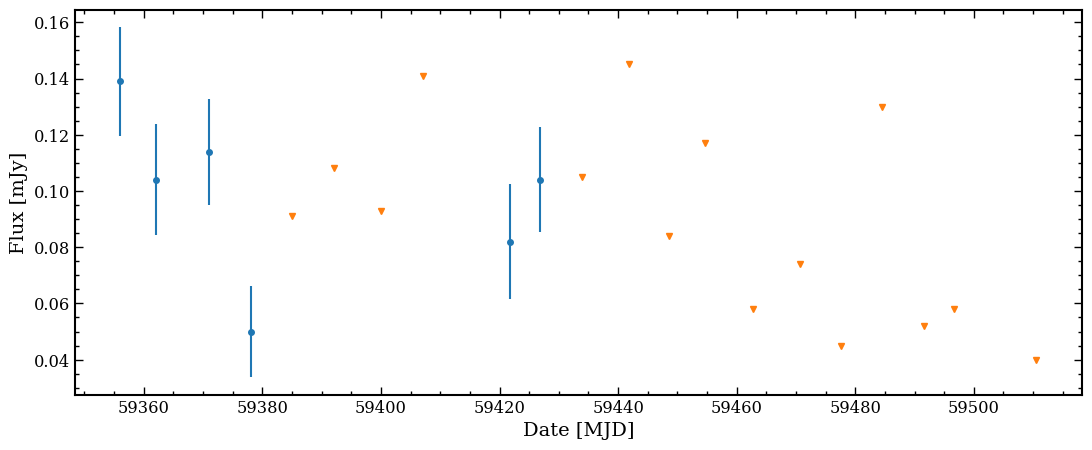

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

The extra data points in the paper are because here we don't include the 2023 data (since it is not part of ThunderKAT). The differences are because in the paper, a 1D linear interpolation was applied to map the radio observations on to the X-ray times.

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
59378.005200000     0.05000             0.01619             1         2.80000e-10                   2.96415e-11                   3.34162e-11                   False          False          HS             
59384.957500000     0.09100             0.03033             1         2.60000e-10                   2.82091e-11                   2.87026e-11                   True           False          HS             
59392.079400000     0.10800             0.03600             1         3.59000e-10                   3.79032e-11                   3.79032e-11                   True           False          HS             
59399.948500000     0.09300             0.03100             1         4.65000e-10                   5.24749e-11                   5.24749e-11                   True           F

In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

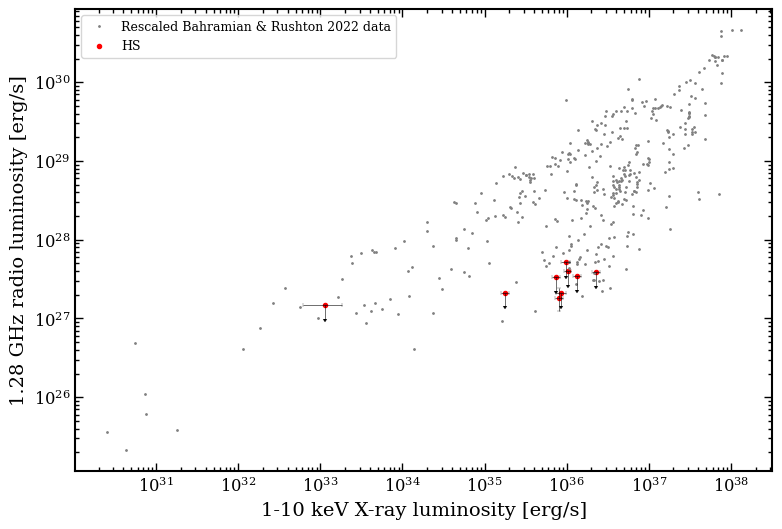

In [10]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  294
Rejected based on distance: radio_MJD = 59356.0664; time_to_nearest: 8.151999999994587; time_to_furthest: 59356.0664
Rejected based on distance: radio_MJD = 59361.9971; time_to_nearest: 2.221299999997427; time_to_furthest: 59361.9971
Rejected based on distance: radio_MJD = 59370.9384; time_to_nearest: 6.720000000001164; time_to_furthest: 7.948100000001432
59378.0052: time_to_nearest: 0.8813000000009197 & time_to_furthest: 13.786800000001676; y_predict_err: 0.05590708512017173
59384.9575: time_to_nearest: 0.8300000000017462 & time_to_furthest: 6.070999999996275; y_predict_err: 0.04940547922582006
59392.0794: time_to_nearest: 0.587599999998929 & time_to_furthest: 6.291900000003807; y_predict_err: 0.04550082945187839
59399.9485: time_to_nearest: 0.5432999999975436 & time_to_furthest: 6.822700000004261; y_predict_err: 0.05324317196137507
59407.0643: time_to_nearest: 0.2930999999953201 & time_to_furthest: 6.478100000000268; y_predict_err:

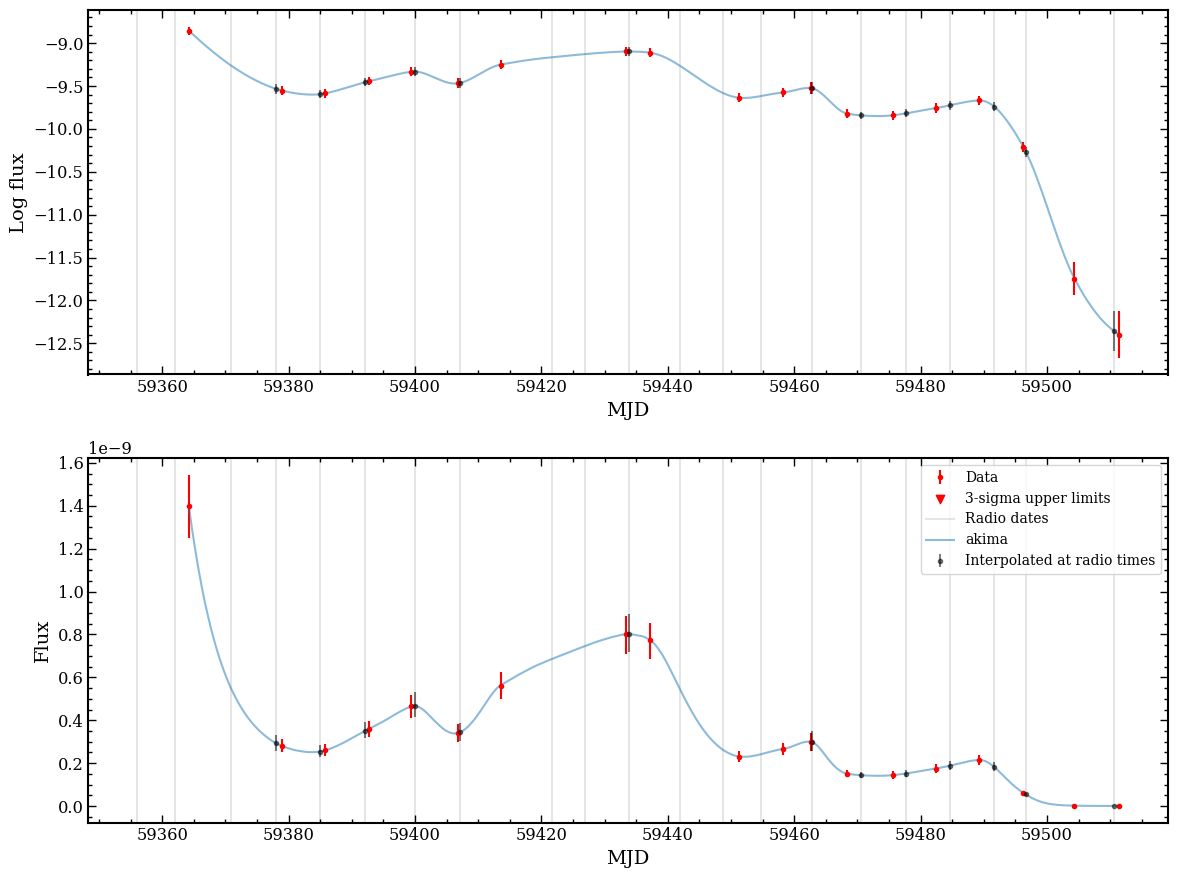

Number of used interpolated data points:  13
Converting to luminosity using d_kpc = 4.9


In [11]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

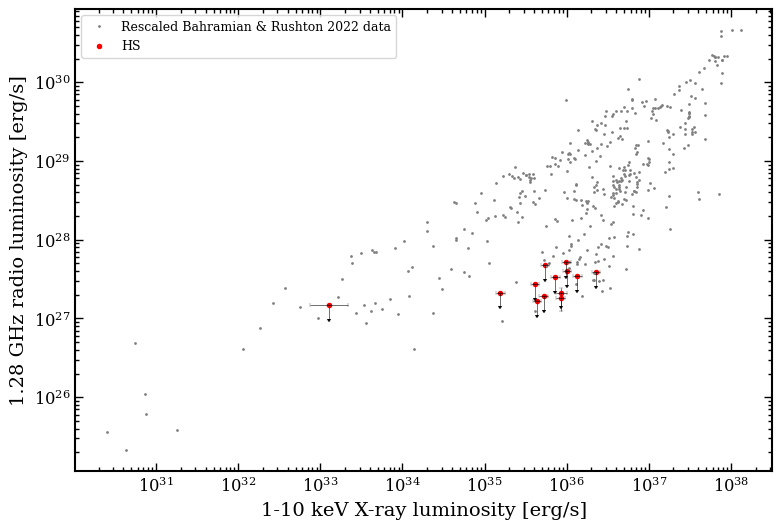

In [12]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)